In [1]:
%matplotlib notebook

import numpy as np
from matplotlib import pyplot as plt

np.set_printoptions(precision=5,linewidth=120,suppress=True)

In [2]:
def DPIterate(problem, cost_to_go):
    """
    This function gets a DP problem and a cost to go and return the new cost to go (N-1) and opt. control
    the "problem" class needs to implement:
    - states: an iterator over all possible states
    - controls(s): a function that returns an iterator over possible controls at state s
    - dynamics(s,u): returns next state
    - index(s): return the index of state s
    - cost_fn(s): return instantaneous cost
    """
    #we allocate the variables for the cost to go and control to be returned
    new_cost_to_go = np.zeros_like(cost_to_go)
    opt_control = np.zeros_like(cost_to_go)
    
    # we iterate over all the states
    for i, s in enumerate(problem.states):
        cost = np.inf
        control = np.inf
        # for all possible control actions we compute g(xt,u) + cost_to_go(xt+1)
        for u in problem.controls(s):
            # compute the next state from s when u is used
            s_next = problem.dynamics(s, u)
            # compute the cost incurred
            temp_cost = cost_to_go[problem.index(s_next)] + problem.cost_fn(s, u)
            # check if this is a potential minimum and update accordingly
            if temp_cost < cost:
                cost = temp_cost
                control = u
        # compute the cost to go for state indexed at i and the associated optimal control
        new_cost_to_go[i] = cost
        opt_control[i] = control
    return new_cost_to_go, opt_control

In [3]:
class ProblemExercise2():
    """
    This class defines the problem of exercise 2 (the dynamics, costs, controls) 
    that will be used in the DP iteration above
    
    it implements the required:
    - states: an iterator over all possible states
    - controls(s): a function that returns an iterator over possible controls at state s
    - dynamics(s,u): returns next state
    - index(s): return the index of state s
    - cost_fn(s): return instantaneous cost
    - get_terminal_cost: return a vector of terminal costs (one per state)
    """
    def __init__(self):
        self.states = np.array([-4,-3,-2,-1,0,1,2,3,4])
        self.nstates = len(self.states)
        
    def dynamics(self, x, u):
        news = x + u
        return news
    
    def controls(self, x):
        # possible controls
        u_temp = np.array([-2,-1,0,1,2])
        # check which ones go beyond the allowed states and remove
        x_temp = u_temp + x
        x, ind1, ind2 = np.intersect1d(x_temp, self.states, return_indices=True)
        # return the allowed control actions
        return u_temp[ind1]

    def cost_fn(self, x, u, w=0):
        return (x+4)**2 + u**2
    
    def get_terminal_cost(self):
        terminal_cost = np.zeros_like(self.states) + np.inf
        terminal_cost[4] = 0
        return terminal_cost

    def index(self, s):
        return np.argwhere(self.states==s)
    

# Solutions for exercise 2

In [4]:
# we instantiat the problem
problem = ProblemExercise2()

# the horizon
N = 15

# allocate and initialize the necessary variables
opt_cost_to_go = np.zeros([problem.nstates, N+1])
opt_cost_to_go[:,-1] = problem.get_terminal_cost()
opt_control = np.zeros([problem.nstates, N])

# the DP algorithm, going backwards N times
for i in range(N):
    opt_cost_to_go[:,N-i-1], opt_control[:, N-i-1] = DPIterate(problem, opt_cost_to_go[:,N-i])
    
print('the states of the problem are: ')
print(problem.states)
print('\n the associated optimal cost to go is\n (rows = states // columns = steps)')
print(opt_cost_to_go)
print('\n the optimal control actions are\n (rows = states // columns = steps) \n (inf means that there is no optimal action at the state/stage that leads to a finite cost)')
print(opt_control)
print('\n\n')

the states of the problem are: 
[-4 -3 -2 -1  0  1  2  3  4]

 the associated optimal cost to go is
 (rows = states // columns = steps)
[[ 11.  11.  11.  11.  11.  11.  11.  11.  11.  11.  11.  11.  11.  12.  inf  inf]
 [ 13.  13.  13.  13.  13.  13.  13.  13.  13.  13.  13.  12.  11.  10.  inf  inf]
 [ 18.  18.  18.  18.  18.  18.  18.  18.  18.  18.  17.  16.  15.  12.   8.  inf]
 [ 26.  26.  26.  26.  26.  26.  26.  26.  26.  26.  25.  24.  22.  18.  10.  inf]
 [ 38.  38.  38.  38.  38.  38.  38.  38.  38.  37.  36.  35.  32.  27.  16.   0.]
 [ 55.  55.  55.  55.  55.  55.  55.  55.  55.  54.  53.  51.  47.  39.  26.  inf]
 [ 78.  78.  78.  78.  78.  78.  78.  78.  77.  76.  75.  72.  67.  56.  40.  inf]
 [108. 108. 108. 108. 108. 108. 108. 108. 107. 106. 104. 100.  92.  79.  inf  inf]
 [146. 146. 146. 146. 146. 146. 146. 145. 144. 143. 140. 135. 124. 108.  inf  inf]]

 the optimal control actions are
 (rows = states // columns = steps) 
 (inf means that there is no optimal action a

## Part b

In [5]:
print('the cost to go for x4=4 is ' + str(opt_cost_to_go[-1,4]))

the cost to go for x4=4 is 146.0


## Part c

State Sequence
[[ 0. -2. -3. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -3. -2.  0.]
 [ 1. -1. -3. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -3. -2.  0.]
 [-4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -3. -2.  0.]]
Optimal Control
[[-2. -1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  2.]
 [-2. -2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  2.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  2.]]
Associated Optimal Cost
[[38. 18. 13. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 10.  8.  0.]
 [55. 26. 13. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 10.  8.  0.]
 [11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 10.  8.  0.]]


<IPython.core.display.Javascript object>


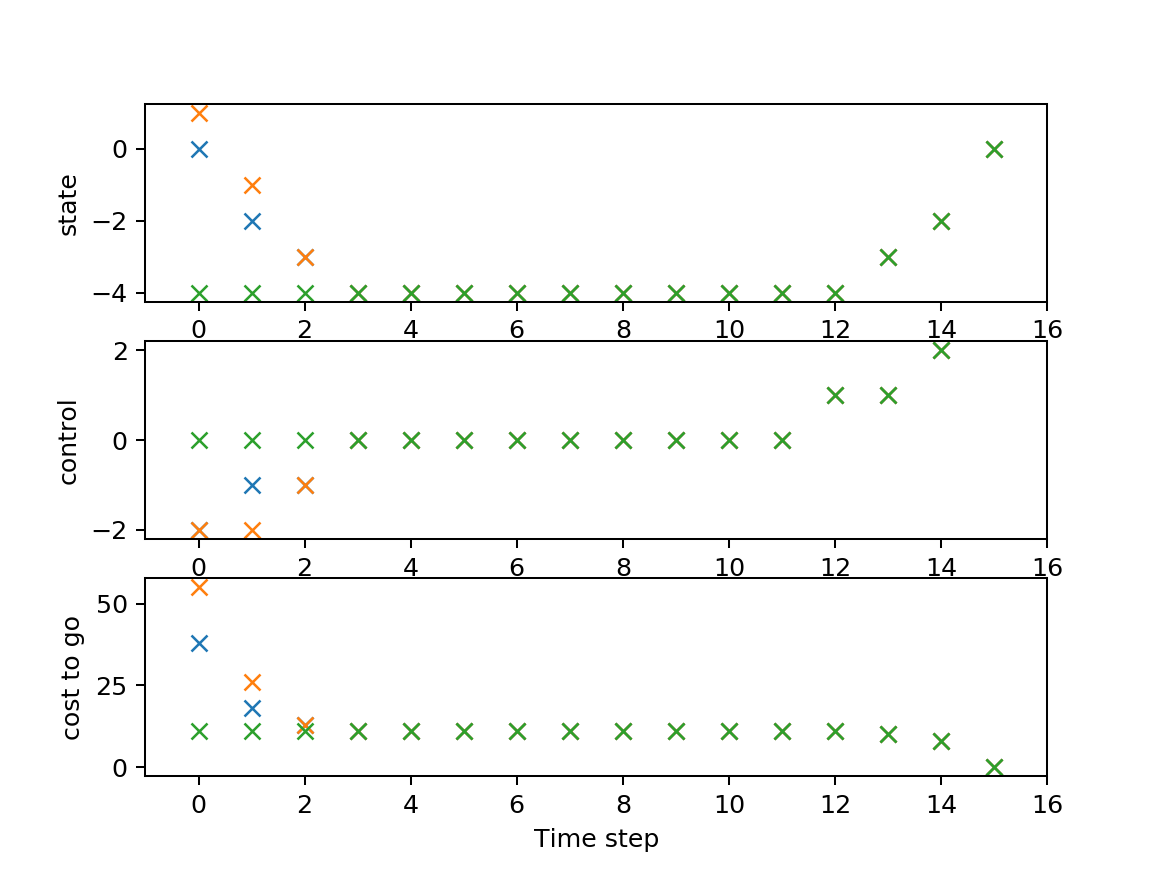

Text(0.5, 0, 'Time step')

In [6]:
# x0=0 1 -4
x = np.zeros([3,N+1])
x[:,0] = np.array([0, 1, -4])
u = np.zeros([3,N])
cost = np.zeros([3, N+1])
states = np.array([-4,-3,-2,-1,0,1,2,3,4])
for i in range(N):
    for j in range(3):
        #print(x[j,i])
        ind = np.where(states == int(x[j,i]))[0]
        #print(ind)
        u[j,i] = opt_control[ind,i]
        cost[j, i] = opt_cost_to_go[ind, i]
    x[:, i+1] = x[:,i] + u[:,i]
print('State Sequence')
print(x)
print('Optimal Control')
print(u)
print('Associated Optimal Cost')
print(cost) # Associated Optimal Cost
plt.figure()
plt.subplot(3,1,1)
plt.plot(np.matrix.transpose(x),'x') # State Sequence
plt.ylabel('state')
plt.xlim([-1,16])
plt.subplot(3,1,2)
plt.plot(np.matrix.transpose(u),'x') # Optimal Control
plt.xlim([-1,16])
plt.ylabel('control')
plt.subplot(3,1,3)
plt.plot(np.matrix.transpose(cost),'x') # Optimal Cost
plt.xlim([-1,16])
plt.ylabel('cost to go')
plt.xlabel('Time step')

## Part d

In [7]:
# we instantiat the problem
problem = ProblemExercise2()

# the horizon
N = 15

# allocate and initialize the necessary variables
opt_cost_to_go = np.zeros([problem.nstates, N+1])
# here we set the terminal costs to 0 instead of calling terminal_cost of the problem
opt_control = np.zeros([problem.nstates, N])

# the DP algorithm, going backwards N times
for i in range(N):
    opt_cost_to_go[:,N-i-1], opt_control[:, N-i-1] = DPIterate(problem, opt_cost_to_go[:,N-i])
    
print('the states of the problem are: ')
print(problem.states)
print('\n the associated optimal cost to go is\n (rows = states // columns = steps)')
print(opt_cost_to_go)
print('\n the optimal control actions are\n (rows = states // columns = steps) \n (inf means that there is no optimal action at the state/stage that leads to a finite cost)')
print(opt_control)
print('\n\n')

the states of the problem are: 
[-4 -3 -2 -1  0  1  2  3  4]

 the associated optimal cost to go is
 (rows = states // columns = steps)
[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  2.   2.   2.   2.   2.   2.   2.   2.   2.   2.   2.   2.   2.   2.   1.   0.]
 [  7.   7.   7.   7.   7.   7.   7.   7.   7.   7.   7.   7.   7.   6.   4.   0.]
 [ 15.  15.  15.  15.  15.  15.  15.  15.  15.  15.  15.  15.  15.  14.   9.   0.]
 [ 27.  27.  27.  27.  27.  27.  27.  27.  27.  27.  27.  27.  26.  24.  16.   0.]
 [ 44.  44.  44.  44.  44.  44.  44.  44.  44.  44.  44.  44.  43.  38.  25.   0.]
 [ 67.  67.  67.  67.  67.  67.  67.  67.  67.  67.  67.  66.  64.  56.  36.   0.]
 [ 97.  97.  97.  97.  97.  97.  97.  97.  97.  97.  97.  96.  91.  78.  49.   0.]
 [135. 135. 135. 135. 135. 135. 135. 135. 135. 135. 134. 132. 124. 104.  64.   0.]]

 the optimal control actions are
 (rows = states // columns = steps) 
 (inf means that there is no optimal action a

State Sequence
[[ 0. -2. -3. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4.]
 [ 1. -1. -3. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4.]
 [-4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4.]]
Optimal Control
[[-2. -1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-2. -2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
Associated Optimal Cost
[[27.  7.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [44. 15.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


<IPython.core.display.Javascript object>


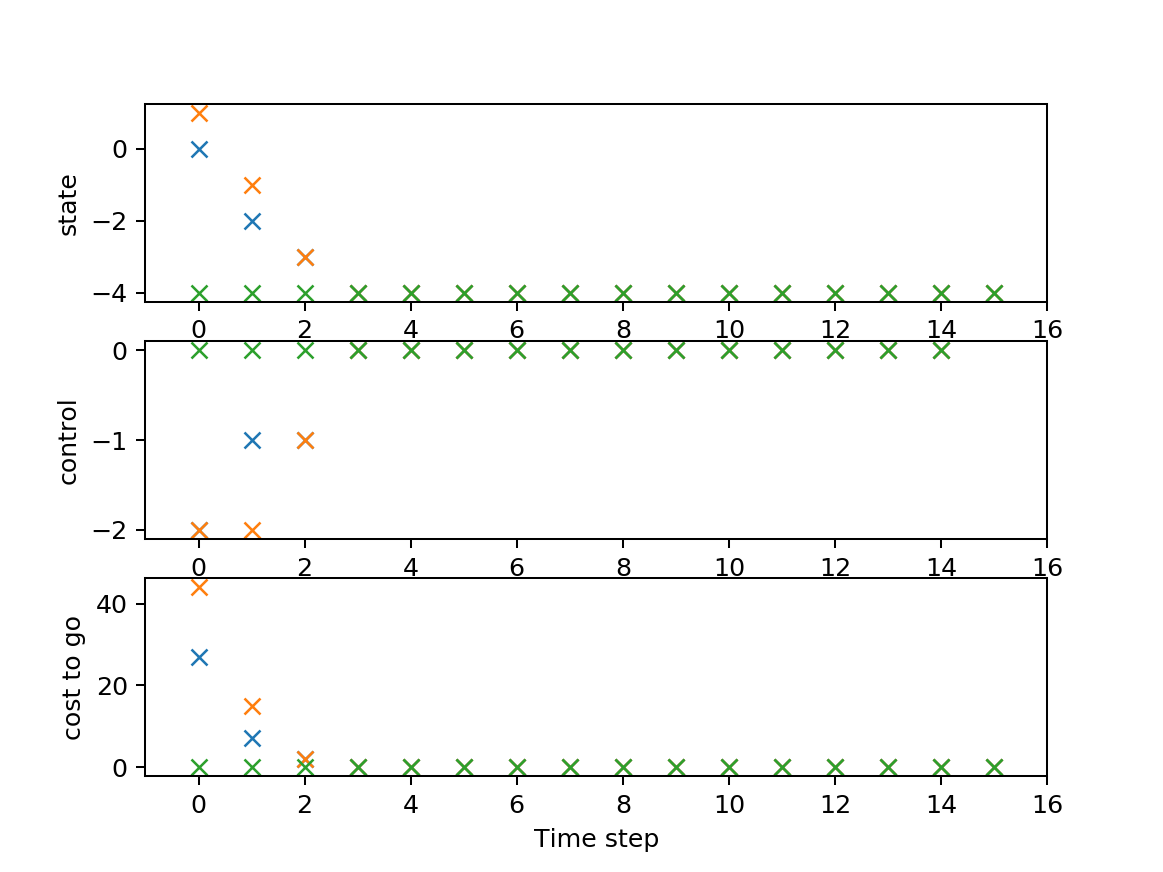

Text(0.5, 0, 'Time step')

In [8]:
# x0=0 1 -4
x = np.zeros([3,N+1])
x[:,0] = np.array([0, 1, -4])
u = np.zeros([3,N])
cost = np.zeros([3, N+1])
states = np.array([-4,-3,-2,-1,0,1,2,3,4])
for i in range(N):
    for j in range(3):
        #print(x[j,i])
        ind = np.where(states == int(x[j,i]))[0]
        #print(ind)
        u[j,i] = opt_control[ind,i]
        cost[j, i] = opt_cost_to_go[ind, i]
    x[:, i+1] = x[:,i] + u[:,i]
print('State Sequence')
print(x)
print('Optimal Control')
print(u)
print('Associated Optimal Cost')
print(cost) # Associated Optimal Cost
plt.figure()
plt.subplot(3,1,1)
plt.plot(np.matrix.transpose(x),'x') # State Sequence
plt.ylabel('state')
plt.xlim([-1,16])
plt.subplot(3,1,2)
plt.plot(np.matrix.transpose(u),'x') # Optimal Control
plt.xlim([-1,16])
plt.ylabel('control')
plt.subplot(3,1,3)
plt.plot(np.matrix.transpose(cost),'x') # Optimal Cost
plt.xlim([-1,16])
plt.ylabel('cost to go')
plt.xlabel('Time step')

The Optimal Cost-to-go drops to 0 at very quickly in early stages. Since state x = -4 give lowest stage cost and since there is no terminal cost, it is not necessary that the state go back to 0 at the end. For previous problem, the terminal cost imposed a terminal contraint x=0 which forced the system to go back to 0, leading to higher overall cost.

## Part e

In [9]:
class ProblemExercise2e():
    """
    This class defines the problem of exercise 2 (the dynamics, costs, controls) 
    that will be used in the DP iteration above
    
    it implements the required:
    - states: an iterator over all possible states
    - controls(s): a function that returns an iterator over possible controls at state s
    - dynamics(s,u): returns next state
    - index(s): return the index of state s
    - cost_fn(s): return instantaneous cost
    - get_terminal_cost: return a vector of terminal costs (one per state)
    """
    def __init__(self):
        self.states = np.array([-4,-3,-2,-1,0,1,2,3,4])
        self.nstates = len(self.states)
        
    def dynamics(self, x, u):
        news = x + u
        return news
    
    def controls(self, x):
        # possible controls
        u_temp = np.array([-2,-1,0,1,2])
        # check which ones go beyond the allowed states and remove
        x_temp = u_temp + x
        x, ind1, ind2 = np.intersect1d(x_temp, self.states, return_indices=True)
        # return the allowed control actions
        return u_temp[ind1]

    def cost_fn(self, x, u, w=0):
        return (x+4)**2
    
    def get_terminal_cost(self):
        terminal_cost = np.zeros_like(self.states)
        return terminal_cost

    def index(self, s):
        return np.argwhere(self.states==s)

In [10]:
# we instantiat the problem
problem = ProblemExercise2e()

# the horizon
N = 15

# allocate and initialize the necessary variables
opt_cost_to_go = np.zeros([problem.nstates, N+1])
# here we set the terminal costs to 0 instead of calling terminal_cost of the problem
opt_control = np.zeros([problem.nstates, N])

# the DP algorithm, going backwards N times
for i in range(N):
    opt_cost_to_go[:,N-i-1], opt_control[:, N-i-1] = DPIterate(problem, opt_cost_to_go[:,N-i])
    
print('the states of the problem are: ')
print(problem.states)
print('\n the associated optimal cost to go is\n (rows = states // columns = steps)')
print(opt_cost_to_go)
print('\n the optimal control actions are\n (rows = states // columns = steps) \n (inf means that there is no optimal action at the state/stage that leads to a finite cost)')
print(opt_control)
print('\n\n')

the states of the problem are: 
[-4 -3 -2 -1  0  1  2  3  4]

 the associated optimal cost to go is
 (rows = states // columns = steps)
[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   0.]
 [  4.   4.   4.   4.   4.   4.   4.   4.   4.   4.   4.   4.   4.   4.   4.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.   9.   0.]
 [ 20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  16.   0.]
 [ 35.  35.  35.  35.  35.  35.  35.  35.  35.  35.  35.  35.  35.  34.  25.   0.]
 [ 56.  56.  56.  56.  56.  56.  56.  56.  56.  56.  56.  56.  56.  52.  36.   0.]
 [ 84.  84.  84.  84.  84.  84.  84.  84.  84.  84.  84.  84.  83.  74.  49.   0.]
 [120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 116. 100.  64.   0.]]

 the optimal control actions are
 (rows = states // columns = steps) 
 (inf means that there is no optimal action a

State Sequence
[[ 0. -2. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4.]
 [ 1. -1. -3. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4.]
 [-4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4.]]
Optimal Control
[[-2. -2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-2. -2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
Associated Optimal Cost
[[20.  4.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [35. 10.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


<IPython.core.display.Javascript object>


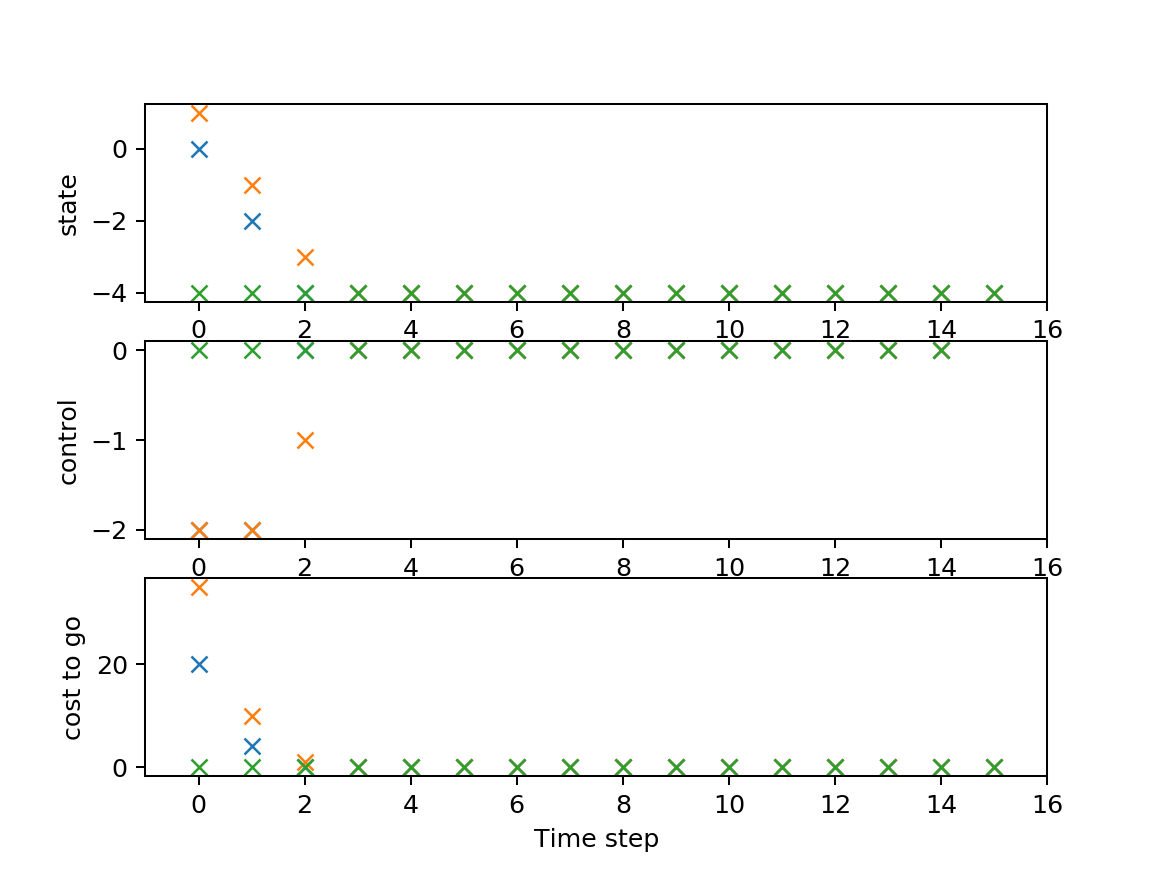

Text(0.5, 0, 'Time step')

In [11]:
# x0=0 1 -4
x = np.zeros([3,N+1])
x[:,0] = np.array([0, 1, -4])
u = np.zeros([3,N])
cost = np.zeros([3, N+1])
states = np.array([-4,-3,-2,-1,0,1,2,3,4])
for i in range(N):
    for j in range(3):
        #print(x[j,i])
        ind = np.where(states == int(x[j,i]))[0]
        #print(ind)
        u[j,i] = opt_control[ind,i]
        cost[j, i] = opt_cost_to_go[ind, i]
    x[:, i+1] = x[:,i] + u[:,i]
print('State Sequence')
print(x)
print('Optimal Control')
print(u)
print('Associated Optimal Cost')
print(cost) # Associated Optimal Cost
plt.figure()
plt.subplot(3,1,1)
plt.plot(np.matrix.transpose(x),'x') # State Sequence
plt.ylabel('state')
plt.xlim([-1,16])
plt.subplot(3,1,2)
plt.plot(np.matrix.transpose(u),'x') # Optimal Control
plt.xlim([-1,16])
plt.ylabel('control')
plt.subplot(3,1,3)
plt.plot(np.matrix.transpose(cost),'x') # Optimal Cost
plt.xlim([-1,16])
plt.ylabel('cost to go')
plt.xlabel('Time step')

Since the cost for the control is removed, it is possible to use more aggressive control actions at no cost to get the state to -4 quicker, thus leading to a lower overall cost.